Umbralizacion

In [1]:
#Importaciones de librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt

Tecnica isodata

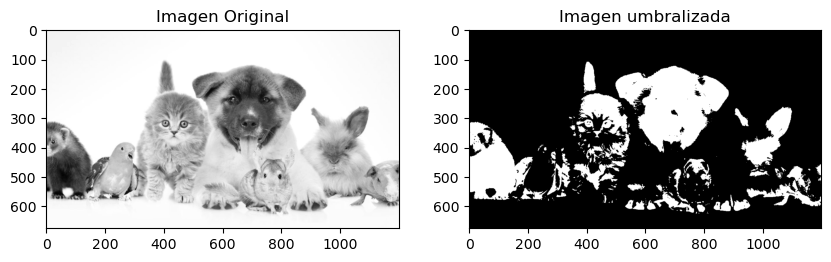

In [24]:
def isodata(img):
  umbral = 128
  while True:
    grup1 = img[img<=umbral]
    grup2 = img[img>=umbral]

    mediag1 = np.mean(grup1)
    mediag2 = np.mean(grup2)

    umbral_n  = (mediag1 + mediag2)/2
    
    if abs(umbral_n - umbral) < 0.5:
      break

    umbral = umbral_n

  return umbral

img = cv2.imread('../Img/mascotas.jpg', 0)
umbral_isodata = isodata(img)

_, img_isodata = cv2.threshold(img, umbral_isodata, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(img_isodata, cmap='gray')


Tecnica de Dos Picos

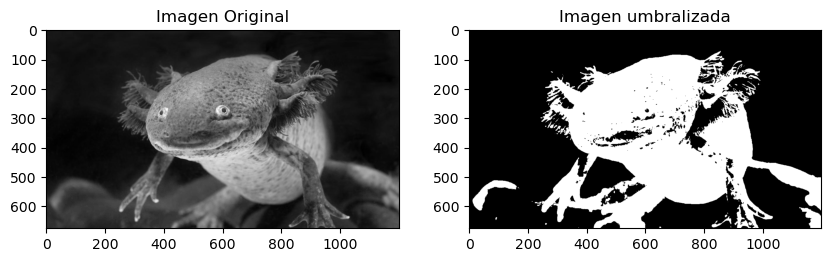

In [27]:
def dos_picos(img):
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])
  pico = np.array(hist)
  pico = pico.flatten()
  pico_diff = np.diff(pico)
  first_pico = np.argmax(pico_diff[:128])
  secon_pico = np.argmax(pico_diff[128:])+128
  umbral = int((first_pico + secon_pico)/2)
  return umbral

img = cv2.imread("../Img/salamandra.png", 0)

umbral_2picos =  dos_picos(img)
_, img_2_picos = cv2.threshold(img, umbral_2picos, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(img_2_picos, cmap='gray')

Metodo de OTSU

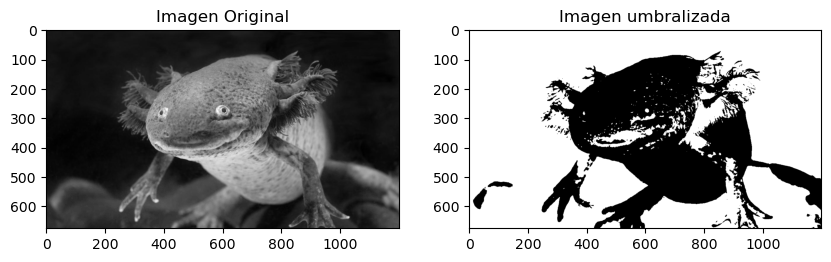

In [72]:
img = cv2.imread("../Img/salamandra.png", 0)
_, img_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

umbral_img_otsu = np.where(img > img_otsu, 255, 0).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(umbral_img_otsu, cmap='gray')

0


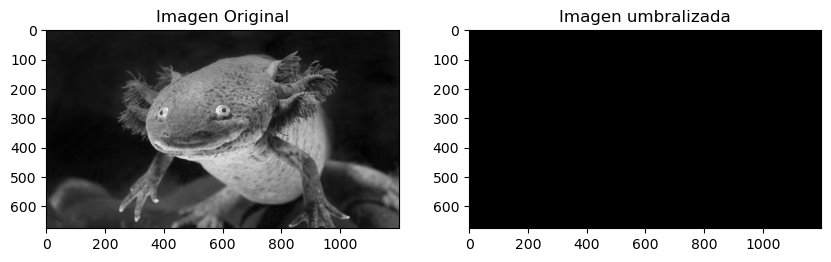

In [ ]:
def otsu_threshold(histogram): 
  # Vector de probabilidad acumulada.
  omega = np.zeros(256) 
  # Vector de media acumulada.
  mean = np.zeros(256) 
  # Partiendo del histograma normalizado se calculan la probabilidad# acumulada (omega) y la media acumulada (mean).
  omega[0] = histogram[0] 
  for i in np.arange(len(histogram)): 
    omega[i] = omega[i-1] + histogram[i]
    mean[i] = mean[i-1] + i * histogram[i]
  sigmaB2 =0 
  mt = mean[len(histogram)-1]
  # Valor de la intensidad media de la imagen
  sigmaB2max =0 
  T =0 
  for i in np.arange(len(histogram)): 
    clase1 = omega[i] 
    clase2 =1 - clase1 
    if clase1 !=0 and clase2 !=0: 
      m1 = mean[i] / clase1 
      m2 = (mt - mean[i]) / clase2
      sigmaB2 = (clase1 * (m1 - mt) * (m1 - mt) +clase2 * (m2 - mt) * (m2 - mt)) 
      if sigmaB2 > sigmaB2max: 
        sigmaB2max = sigmaB2 
        T = i 
  return int(T)

img = cv2.imread("../Img/salamandra.png", 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
thr = otsu_threshold(hist)
_, umbr_otsu = cv2.threshold(img, thr, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(umbr_otsu, cmap='gray')

Umbrelizaciones Variables - particion de una imagen

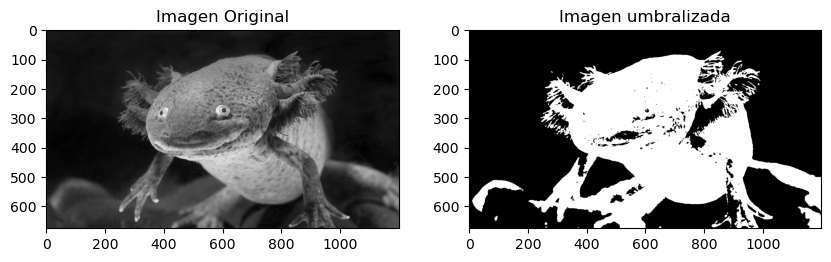

In [42]:
def variable_umb_block(img, block_size, c):
  umbral_img = np.zeros_like(img)
  for y in range(0, img.shape[0], block_size):
    for x in range(0, img.shape[1], block_size):
      block = img[y:y+block_size, x:x+block_size]
      block_media = np.mean(block_size)
      umbral_adap = block_media - c
      umbral_img[y:y+block_size, x:x+block_size] = (block > umbral_adap) * 255
  
  return umbral_img

img = cv2.imread("../Img/salamandra.png", 0)
size_block = 100
c = 30
umbral_img_adap = variable_umb_block(img, size_block, c)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(umbral_img_adap, cmap='gray')

Umbralizacion con desviacion

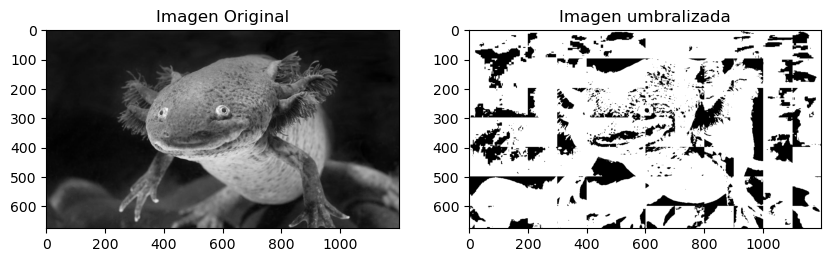

In [ ]:
def umbra_var_desv(img, block_size, conf):
  umbral_img = np.zeros_like(img)
  for y in range(0, img.shape[0], block_size):
    for x in range(0, img.shape[1], block_size):
      block = img[y:y+block_size, x:x+block_size]
      umbral_block = np.mean(block)
      des = np.std(block)
      umbral_adap = umbral_block - (conf * des)
      umbral_img[y:y+block_size, x:x+block_size] = (block> umbral_adap) * 255
  return umbral_img

img = cv2.imread("../Img/salamandra.png", 0)
size_block = 100
c =0.8
umbral_img_adap = umbra_var_desv(img, size_block, c)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(umbral_img_adap, cmap='gray')

Adaptativa con Ventana

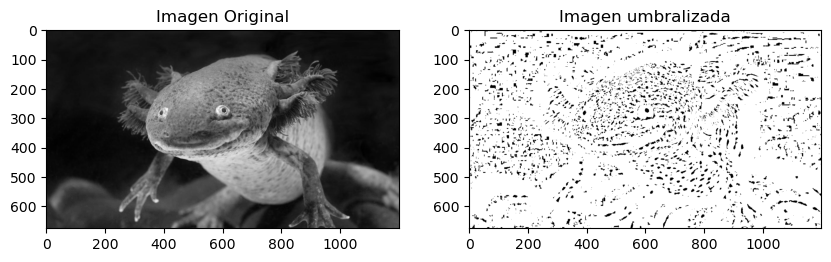

In [64]:
def ventana(img, win, fact):
  umbral_img = np.zeros_like(img)
  pad = win//2
  padd_img = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      win1 = padd_img[y:y+win, x:x+win]
      media = np.mean(win1)
      dis = np.std(win1)
      umbral = media - (fact * dis)
      umbral_img[y,x] = 255 if img[y,x]> umbral else 0
  return umbral_img

img = cv2.imread("../Img/salamandra.png", 0)
win = 25
fact = 1
umbral_img_adap = ventana(img, win, fact)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(umbral_img_adap, cmap='gray')

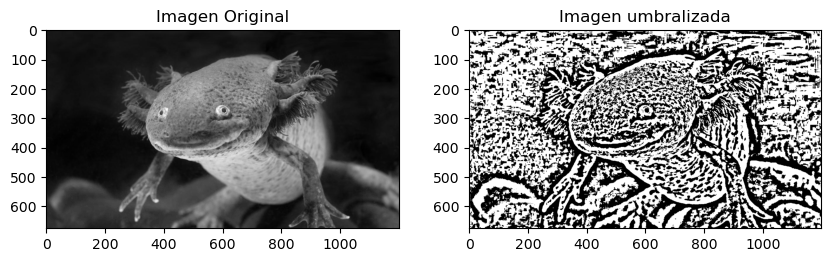

In [66]:
img = cv2.imread("../Img/salamandra.png", 0)
win = 25
fact = 1
img_umbr = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, win, fact)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagen umbralizada')
plt.imshow(img_umbr, cmap='gray')

Contraste a Colores

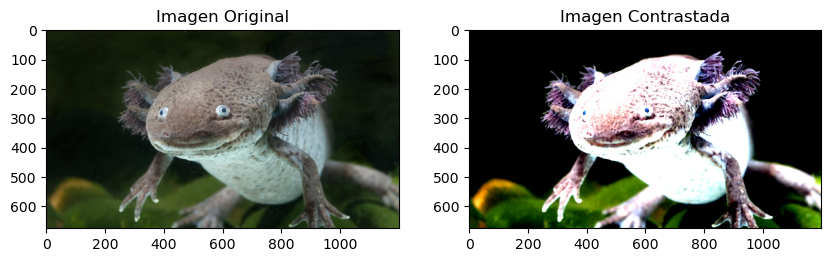

In [17]:
def contraste_color(img, fact=1.0):
  img = img.astype(np.float32)
  for i in range(3):
    media = np.mean(img[:,:,i])
    img[:,:,i] = media + (img[:,:,i]-media) * fact
    img[:,:,i] = np.clip(img[:,:,i], 0, 255)
  return img.astype(np.uint8)

#usamos la funcion
img_rgb = cv2.cvtColor(cv2.imread('../Img/salamandra.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img_contrs = contraste_color(img_rgb, 3)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.title('Imagen Contrastada')
plt.imshow(img_contrs)

Brillo de imagen

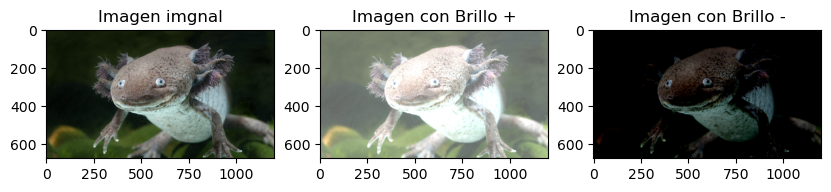

In [27]:
def brillo(img, brillo=0):
  img_brillo = img.astype(np.float32) + brillo
  img_brillo = np.clip(img_brillo,0,255).astype(np.uint8)
  return img_brillo

img = cv2.imread('../Img/salamandra.png', 0)
img_rgb = cv2.cvtColor(cv2.imread('../Img/salamandra.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

img_brillo1 = brillo(img_rgb, brillo=100)
img_brillo2 = brillo(img_rgb, brillo=-100)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('Imagen imgnal')
plt.imshow(img_rgb, cmap='grey')
plt.subplot(1,3,2)
plt.title('Imagen con Brillo +')
plt.imshow(img_brillo1, cmap='grey')
plt.subplot(1,3,3)
plt.title('Imagen con Brillo -')
plt.imshow(img_brillo2, cmap='grey')

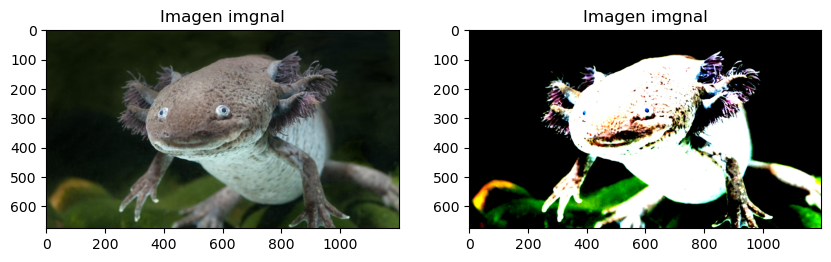

In [34]:
def ajuste(img, contraste = 1.0, brillo=0):
  img= img.astype(np.float32)
  media = np.mean(img)
  img_res = media + (img-media)*contraste+brillo
  img_res = np.clip(img_res,0,255).astype(np.uint8)
  return img_res

img_rgb = cv2.cvtColor(cv2.imread('../Img/salamandra.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
contraste = 7
brillo = -100
img_ajus = ajuste(img_rgb, contraste, brillo)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagen imgnal')
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.title('Imagen imgnal')
plt.imshow(img_ajus)

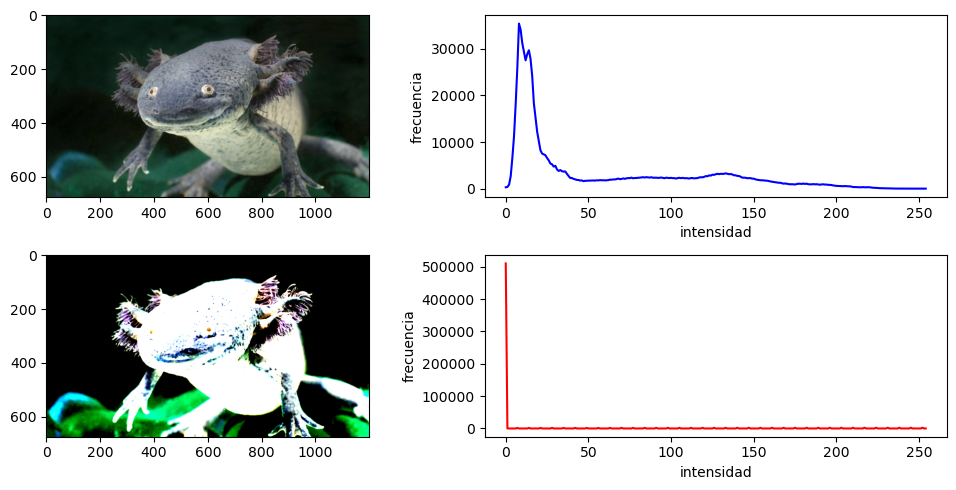

In [37]:
def contraste(img, fact = 1.0):
  img = img.astype(np.float32)
  media = np.mean(img)
  img = media + (img-media)*fact
  img = np.clip(img, 0, 255).astype(np.uint8)
  return img

img = cv2.imread('../Img/salamandra.png')
img_c = contraste(img, 7)
histograma_ori = cv2.calcHist([img],[0],None,[255],[0,255])
histograma_cont = cv2.calcHist([img_c],[0],None,[255],[0,255])

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(2,2,3)
plt.imshow(img_c, cmap='gray')

plt.subplot(2,2,2)
plt.plot(histograma_ori, color='blue')
plt.xlabel('intensidad')
plt.ylabel('frecuencia')
plt.tight_layout()
plt.subplot(2,2,4)
plt.plot(histograma_cont, color='red')
plt.xlabel('intensidad')
plt.ylabel('frecuencia')
plt.tight_layout()
plt.show()


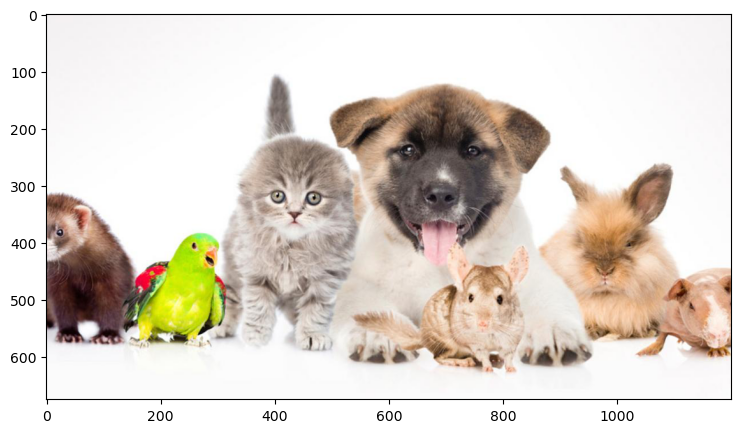

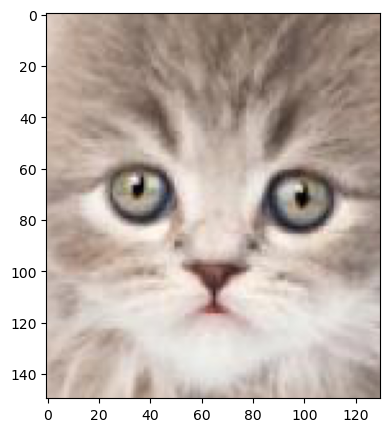

In [ ]:
plt.rcParams['figure.figsize']=[10,5]

img_rgb = cv2.cvtColor(cv2.imread('../Img/mascotas.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

img_recorte = img_rgb[250:400, 370:500]
plt.imsave('img_recorte.jpg', img_recorte)
plt.imshow(img_recorte)
plt.show()

img_sec = plt.imread('img_recorte.jpg')
color = ['r','g','b']
for canal, col in enumerate(color):
  histograma = cv2.calcHist([img_sec],[col],None,[255],[0,255])

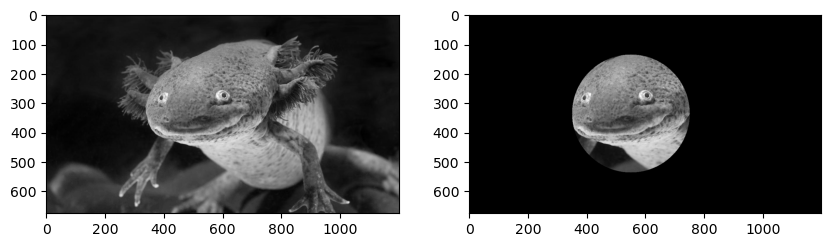

In [52]:
img = cv2.imread('../Img/salamandra.png',0)
alto, ancho = img.shape[:2]

mascara = np.zeros_like(img)
centro = (ancho //2 -50, alto//2)
radio = 200
cv2.circle(mascara, centro, radio, (255), -1)
img_mascara = cv2.bitwise_and(img, img, mask=mascara)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='grey')
plt.subplot(1,2,2)
plt.imshow(img_mascara, cmap='grey')


Ecualizacion de un Histograma

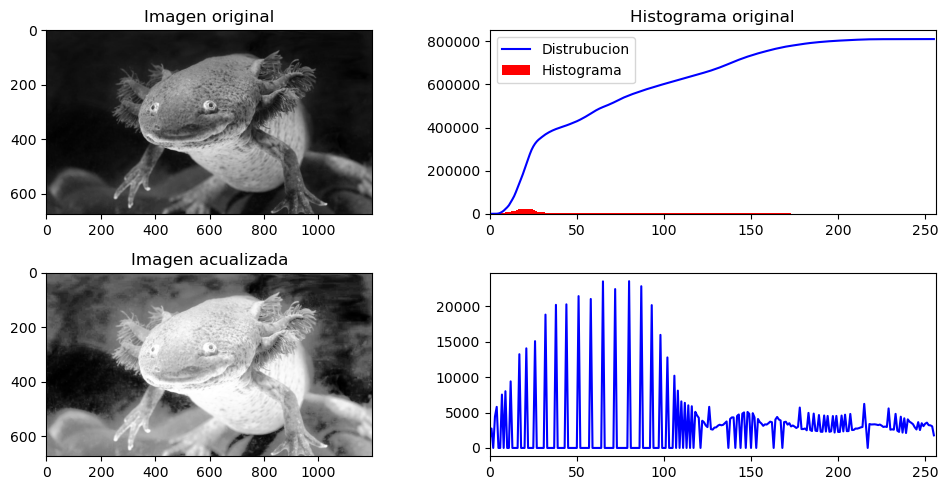

In [13]:
img = cv2.imread('../Img/salamandra.png', 0)

hist,calc = np.histogram(img.flatten(), 256, [0,256])
distAcum = hist.cumsum()
distAcum_n = distAcum * hist.max()/distAcum.max()
equal = cv2.equalizeHist(img)
hist_equal,_ = np.histogram(equal.flatten(), 256, [0,256])

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')

plt.subplot(2,2,2)
plt.plot(distAcum, color='b')
plt.hist(img.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(('Distrubucion', 'Histograma'), loc='upper left')
plt.title('Histograma original')

plt.subplot(2,2,3)
plt.imshow(equal, cmap='gray')
plt.title('Imagen acualizada')

plt.subplot(2,2,4)
plt.plot(hist_equal, color='b')
plt.xlim([0,256])
plt.tight_layout()


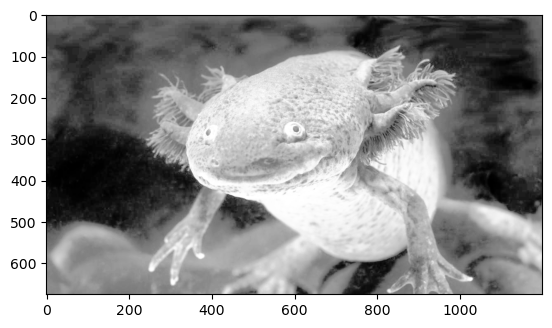

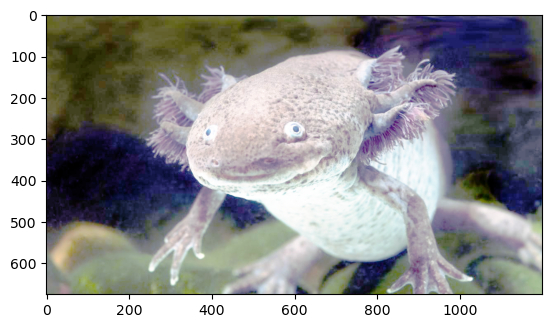

In [17]:
img = cv2.imread('../Img/salamandra.png')
img_g =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equal = cv2.equalizeHist(img_g)
equal_color = cv2.merge([cv2.equalizeHist(img[:,:,0]), cv2.equalizeHist(img[:,:,1]), cv2.equalizeHist(img[:,:,2])])

plt.imshow(equal, cmap='gray')
plt.show()

plt.imshow(cv2.cvtColor(equal_color, cv2.COLOR_BGR2RGB))
plt.show()


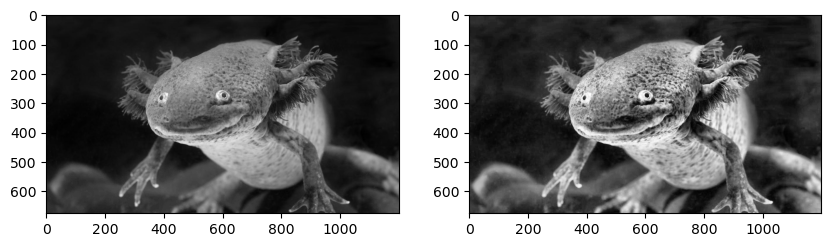

In [20]:
img = cv2.imread('../Img/salamandra.png',0)
clip = 2.0
tiles = 8

clahe= cv2.createCLAHE(clipLimit=clip, tileGridSize=(tiles,tiles))
equal = clahe.apply(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(equal, cmap='gray')
plt.show()



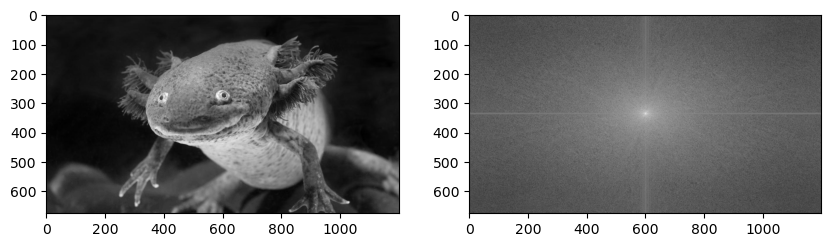

In [21]:
img = cv2.imread('../Img/salamandra.png',0)
trans = np.fft.fft2(img) #transformada e inversa de forier
desp = np.fft.fftshift(trans) #separo el espectro

magnitud_espectro = np.log(1+np.abs(desp))

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(magnitud_espectro, cmap='gray')

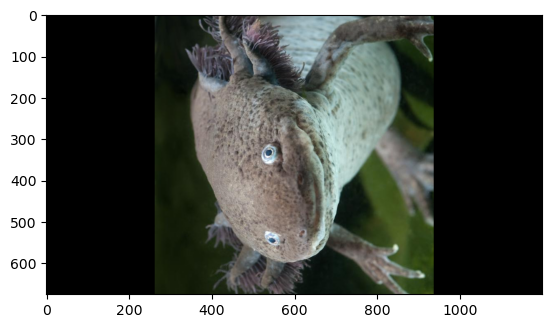

In [8]:
import imutils

img = cv2.cvtColor(cv2.imread('../Img/salamandra.png'), cv2.COLOR_BGR2RGB)

plt.imshow(img)
angulo = 90
rotar = imutils.rotate(img, angulo)
plt.imshow(rotar)
